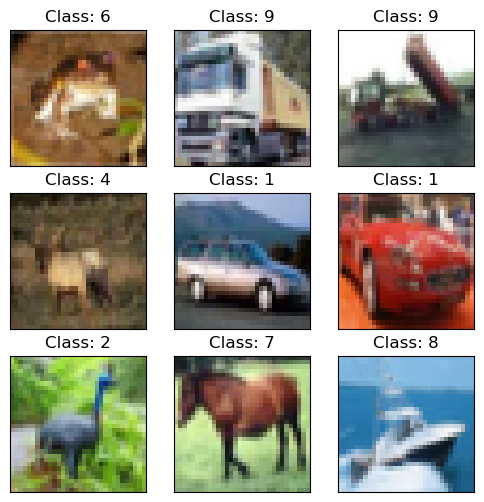

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Function to plot images
def plot_images(images, labels, num_images=9):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(images[i], interpolation='none')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f"Class: {labels[i][0]}")
    plt.show()

# Visualize first 9 images from the training dataset
plot_images(X_train, y_train)


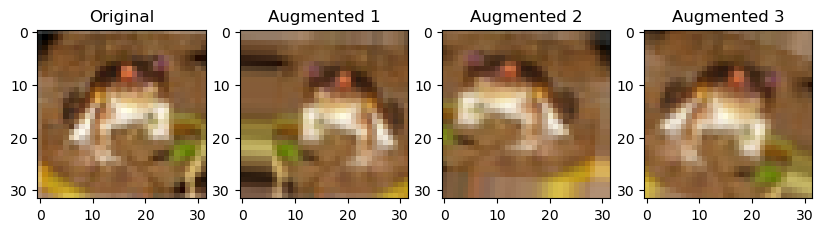

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # rotation
    width_shift_range=0.2,   # horizontal shift
    height_shift_range=0.2,  # vertical shift
    shear_range=0.2,         # shear transformation
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    # horizontal flip
    fill_mode='nearest'
)

# Function to plot augmented images
def plot_augmented_images(data_gen, original_image):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
    axes[0].imshow(original_image, interpolation='none')
    axes[0].set_title('Original')
    for i, ax in enumerate(axes.flat[1:]):
        augmented_image = next(data_gen.flow(np.array([original_image]), batch_size=1))[0].astype('uint8')
        ax.imshow(augmented_image, interpolation='none')
        ax.set_title(f'Augmented {i+1}')
    plt.show()

# Plot augmented images for the first CIFAR-10 image
plot_augmented_images(datagen, X_train[0])


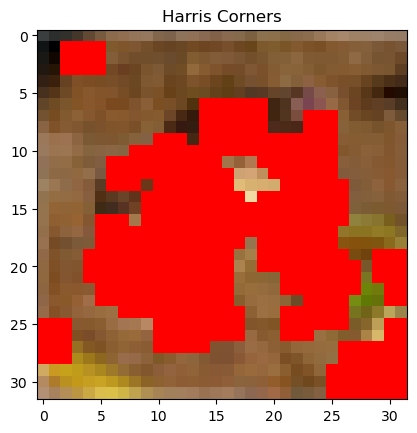

In [ ]:
import cv2

def plot_harris_corners(image):
    blurred_img = cv2.GaussianBlur(image, (5, 5), 0)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.01)
    dst = cv2.dilate(dst, None)
    img = image.copy()
    img[dst > 10000000000 * dst.max()] = [255, 0, 0]  # mark corners in red
    plt.imshow(img)
    plt.title('Harris Corners')
    plt.show()

# Show Harris corners on the first image
plot_harris_corners(X_train[0])


In [ ]:
!pip install opencv-python-headless


  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41a9c841ff1/opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB 5.9 MB/s eta 0:00:07
    --------------------------------------- 1.0/38.5 MB 10.1 MB/s eta 0:00:04
   - -------------------------------------- 1.5/38.5 MB 10.4 MB/s eta 0:00:04
   -- ------------------------------------- 2.3/38.5 MB 12.1 MB/s eta 0:00:03
   --- ------------------------------------ 3.2/38.5 MB 14.4 MB/s eta 0:00:03
   ---- ----------------------------------- 4.2/38.5 MB 14.7 MB/s eta 0:00:03
   ---- ----------------------------------- 4.5/38.5 MB 14.4 MB/s eta 0:00:03
   ----- ---------------------------------- 5.3/38.5 MB 14.1 MB/s eta 0:00:03
   ------ --------------------------------- 5.9/38.5 MB 14.6 MB/s et

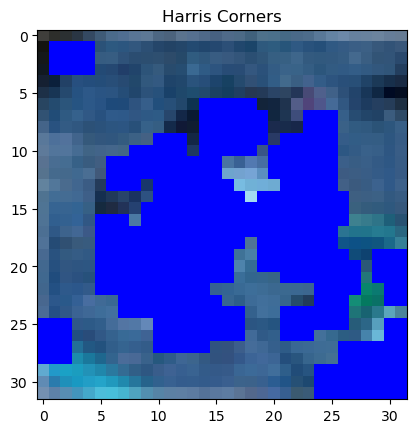

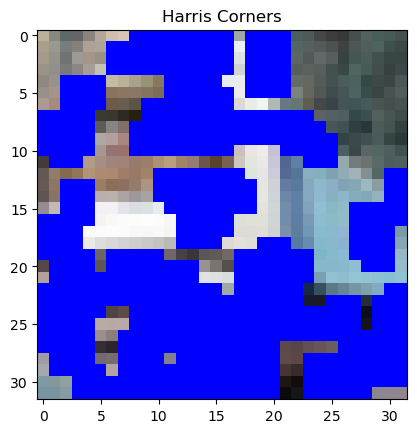

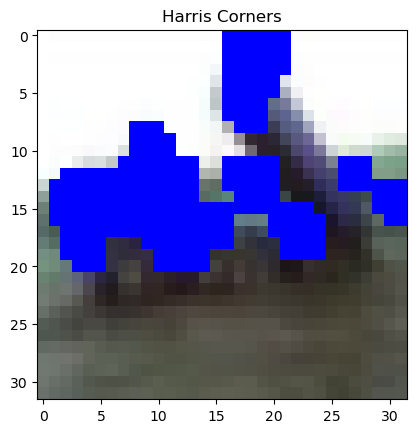

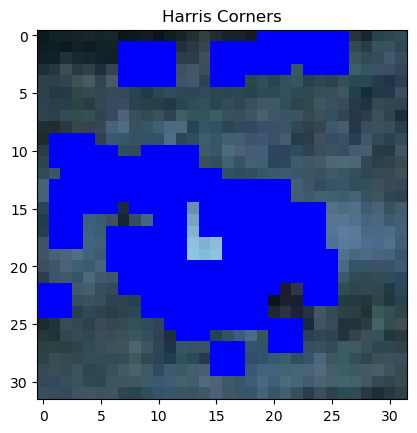

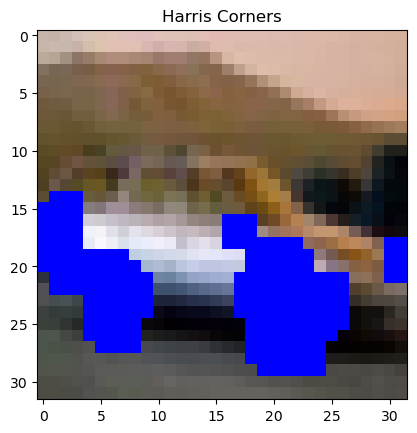

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def plot_harris_corners(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Apply Harris corner detection
    dst = cv2.cornerHarris(gray, 2, 3, 0.06)
    dst = cv2.dilate(dst, None)

    # Threshold for an optimal value, marking the corners in red
    img = image.copy()
    img[dst > 0.01 * dst.max()] = [255, 0, 0]

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Harris Corners')
    plt.show()

# Display Harris corners for the first 5 images in the dataset
for i in range(5):
    plot_harris_corners(X_train[i])


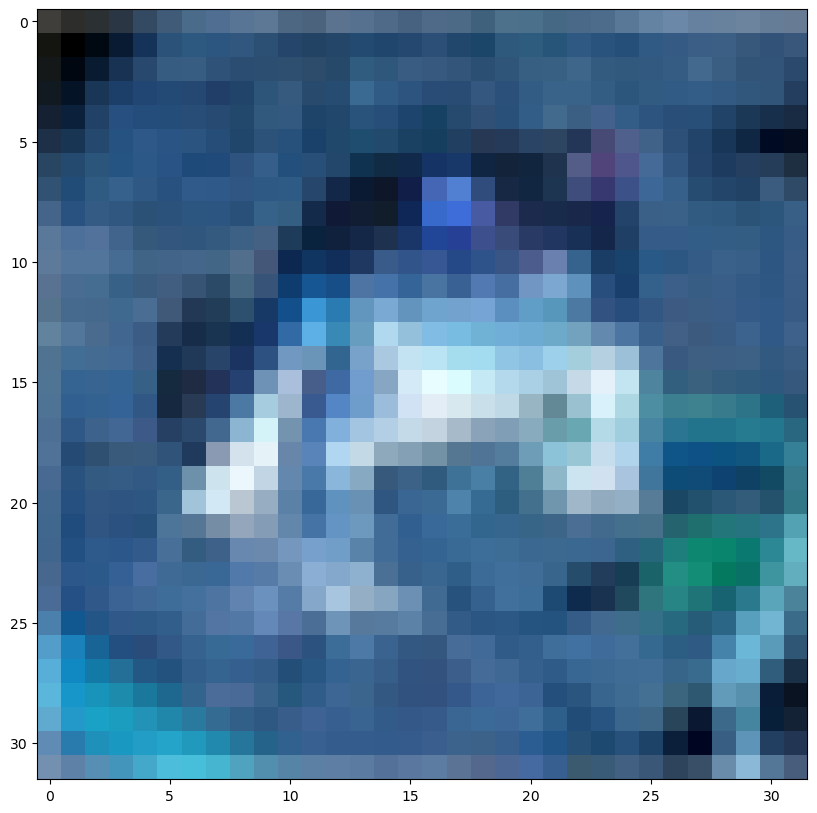

In [ ]:
# load in color image for face detection
image = X_train[0]

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(image)

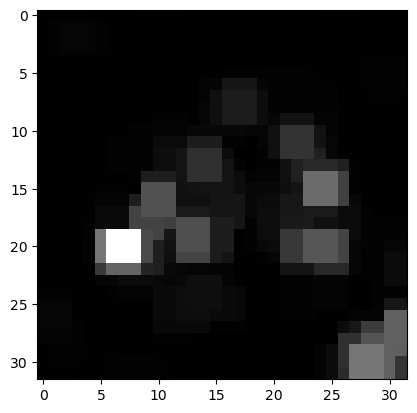

In [ ]:
image_copy = np.copy(image)
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)
#parameters are float image , window size , sobel operators size,constant
dst = cv2.cornerHarris(gray,2,3,0.02)
dst = cv2.dilate(dst , None)#increases white region
plt.imshow(dst , cmap='gray')

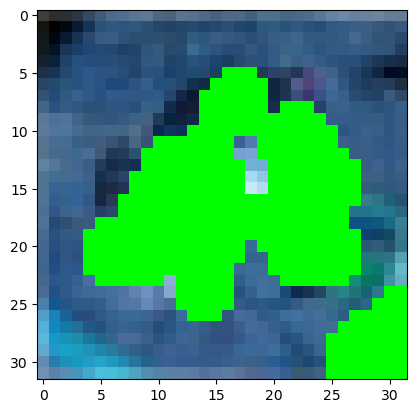

In [ ]:
# Define a threshold for extracting strong corners
# This value varies depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.05*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

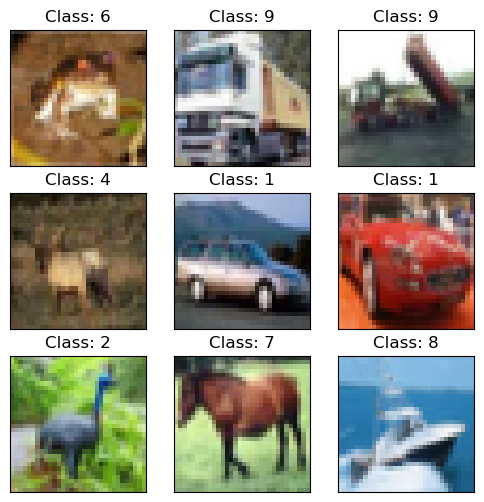

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Function to plot images
def plot_images(images, labels, num_images=9):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(images[i], interpolation='none')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f"Class: {labels[i][0]}")
    plt.show()

# Visualize first 9 images from the training dataset
plot_images(X_train, y_train)


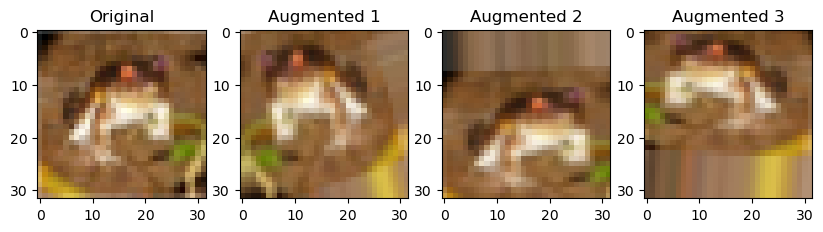

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # rotation
    width_shift_range=0.2,   # horizontal shift
    height_shift_range=0.2,  # vertical shift
    shear_range=0.2,         # shear transformation
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    # horizontal flip
    fill_mode='nearest'
)

# Function to plot augmented images
def plot_augmented_images(data_gen, original_image):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
    axes[0].imshow(original_image, interpolation='none')
    axes[0].set_title('Original')
    for i, ax in enumerate(axes.flat[1:]):
        augmented_image = next(data_gen.flow(np.array([original_image]), batch_size=1))[0].astype('uint8')
        ax.imshow(augmented_image, interpolation='none')
        ax.set_title(f'Augmented {i+1}')
    plt.show()

# Plot augmented images for the first CIFAR-10 image
plot_augmented_images(datagen, X_train[0])


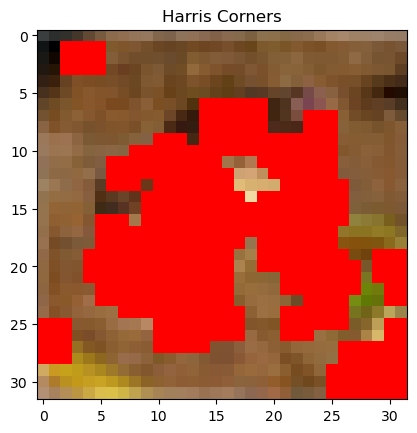

In [ ]:
import cv2

def plot_harris_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    img = image.copy()
    img[dst > 0.01 * dst.max()] = [255, 0, 0]  # mark corners in red
    plt.imshow(img)
    plt.title('Harris Corners')
    plt.show()

# Show Harris corners on the first image
plot_harris_corners(X_train[0])


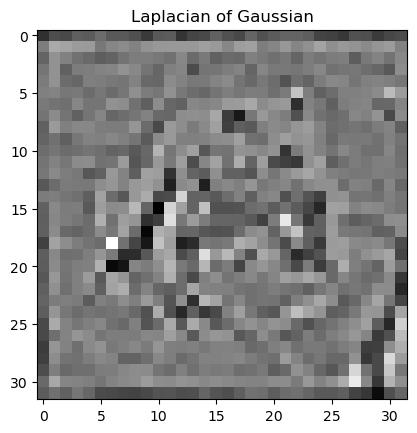

In [ ]:
def plot_log(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    log = cv2.Laplacian(gray, cv2.CV_64F)
    plt.imshow(log, cmap='gray')
    plt.title('Laplacian of Gaussian')
    plt.show()

# Show LoG on the first image
plot_log(X_train[0])


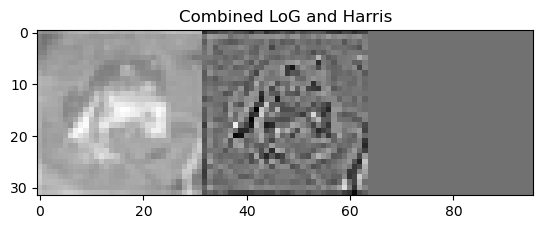

In [ ]:
def combined_log_harris(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    log = cv2.Laplacian(gray, cv2.CV_64F)
    harris = cv2.cornerHarris(gray, 2, 3, 0.04)
    combined = np.hstack((gray, log, harris))  # display side by side
    plt.imshow(combined, cmap='gray')
    plt.title('Combined LoG and Harris')
    plt.show()

# Show combined LoG and Harris on the first image
combined_log_harris(X_train[0])


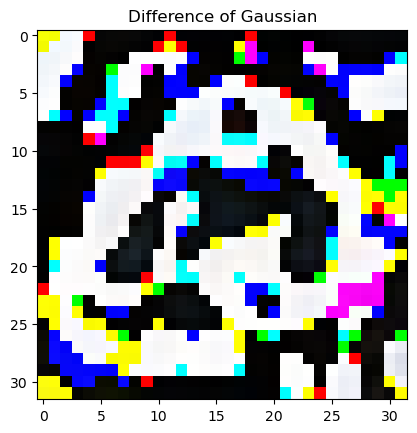

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_DoG(image, ksize1=5, ksize2=9):
    blur1 = cv2.GaussianBlur(image, (ksize1, ksize1), 0)
    blur2 = cv2.GaussianBlur(image, (ksize2, ksize2), 0)
    DoG = blur1 - blur2
    plt.imshow(DoG, cmap='gray')
    plt.title('Difference of Gaussian')
    plt.show()

# Test on a sample image
apply_DoG(X_train[0])


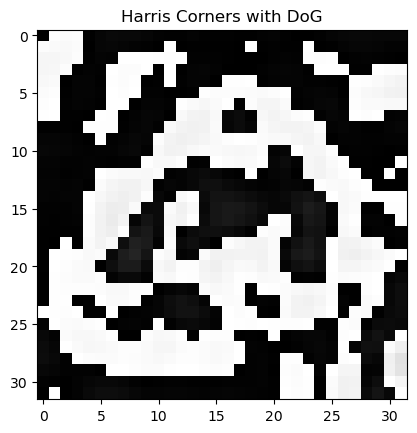

In [ ]:
def plot_harris_with_DoG(image):
    # Harris corners
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    harris_corners = cv2.dilate(harris_corners, None)

    # DoG
    DoG = cv2.GaussianBlur(gray, (5, 5), 0) - cv2.GaussianBlur(gray, (9, 9), 0)

    # Combine
    combined = np.uint8(harris_corners) + np.uint8(DoG)
    plt.imshow(combined, cmap='gray')
    plt.title('Harris Corners with DoG')
    plt.show()

plot_harris_with_DoG(X_train[0])


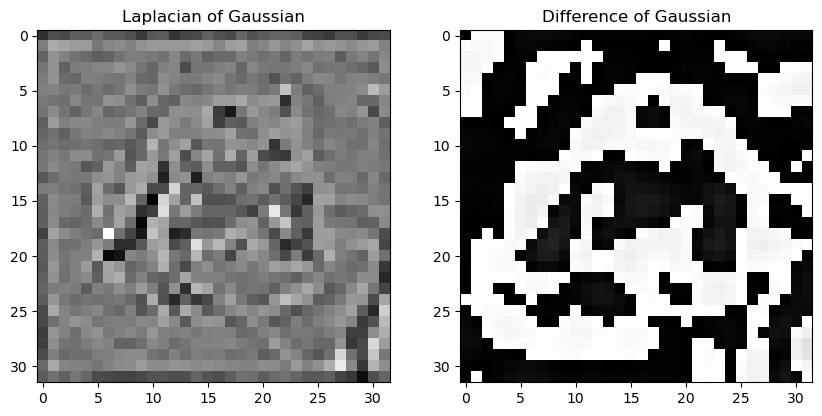

In [ ]:
def plot_log_vs_dog(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    log = cv2.Laplacian(gray, cv2.CV_64F)
    dog = cv2.GaussianBlur(gray, (5, 5), 0) - cv2.GaussianBlur(gray, (9, 9), 0)

    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(log, cmap='gray'), plt.title('Laplacian of Gaussian')
    plt.subplot(122), plt.imshow(dog, cmap='gray'), plt.title('Difference of Gaussian')
    plt.show()

plot_log_vs_dog(X_train[0])


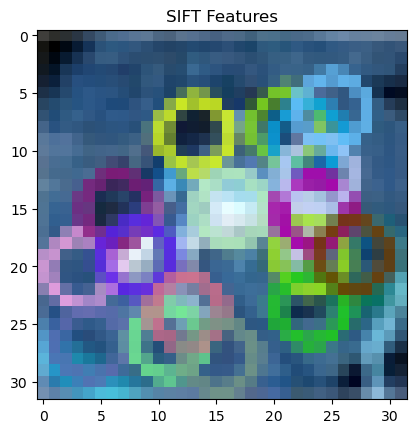

In [ ]:
def extract_sift_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    img_sift = cv2.drawKeypoints(image, keypoints, None)
    plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Features')
    plt.show()

extract_sift_features(X_train[0])


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def extract_sift_features(images):
    sift = cv2.SIFT_create()
    descriptors_list = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        if descriptors is not None:
            descriptors_list.append(descriptors)
    return descriptors_list

# Extract features from training images
sift_descriptors = extract_sift_features(X_train)
all_descriptors = np.vstack(sift_descriptors)


In [ ]:
from sklearn.cluster import MiniBatchKMeans

def create_vocabulary(descriptors, num_words=200):
    kmeans = MiniBatchKMeans(n_clusters=num_words, random_state=0)
    kmeans.fit(descriptors)
    return kmeans

num_visual_words = 200  # Number of visual words (clusters)
vocabulary = create_vocabulary(all_descriptors, num_visual_words)


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [ ]:
def build_histogram(descriptor_list, kmeans):
    histogram = np.zeros(len(kmeans.cluster_centers_))
    for descriptor in descriptor_list:
        # Ensure descriptor is in 2D array format
        if descriptor.ndim == 1:
            descriptor = descriptor.reshape(1, -1)
        cluster_idx = kmeans.predict(descriptor)
        for idx in cluster_idx:
            histogram[idx] += 1
    return histogram


# Build histograms for each image
histograms = np.array([build_histogram(desc, vocabulary) for desc in sift_descriptors])


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create and train the SVM
svm = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm.fit(histograms, y_train.flatten())  # Assume y_train is in the correct shape


In [ ]:
# First, extract features from the test set and build histograms
test_descriptors = extract_sift_features(X_test)
test_histograms = np.array([build_histogram(desc, vocabulary) for desc in test_descriptors])

# Predict using SVM
predictions = svm.predict(test_histograms)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test.flatten(), predictions)
report = classification_report(y_test.flatten(), predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetr

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.53      0.28        36
           1       0.16      0.21      0.18        24
           2       0.08      0.26      0.12        27
           3       0.24      0.14      0.17        29
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        28
           6       0.17      0.06      0.09        34
           7       0.00      0.00      0.00        27
           8       0.16      0.14      0.14        37
           9       0.00      0.00      0.00        35

    accuracy                           0.14       300
   macro avg       0.10      0.13      0.10       300
weighted avg       0.10      0.14      0.10       300

Accuracy: 0.14


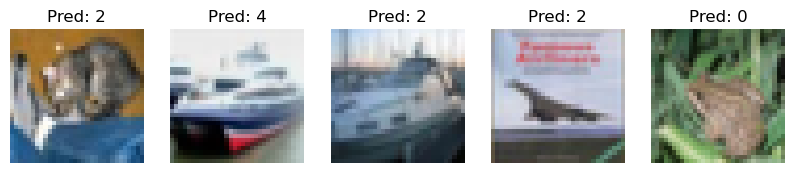

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# Initialize SIFT detector
sift = cv2.SIFT_create()

def extract_features(images):
    descriptors = []
    sift = cv2.SIFT_create()
    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, desc = sift.detectAndCompute(gray, None)
        if desc is not None:
            # Convert descriptors to np.float64
            descriptors.append(desc.astype(np.float64))
    return descriptors

def features_to_histogram(features, kmeans):
    histogram = np.zeros(len(kmeans.cluster_centers_))
    for feature in features:
        if feature is not None:
            # Ensure that features passed to predict are correct dtype
            feature = feature.astype(np.float64)
            idx = kmeans.predict(feature.reshape(1, -1))
            histogram[idx] += 1
    return histogram


# Extract features from a subset of images for computational efficiency
train_desc = extract_features(X_train[:1000])  # Limiting the number for computation reasons
all_train_desc = np.vstack(train_desc)

# Clustering features to create a visual vocabulary
kmeans = MiniBatchKMeans(n_clusters=200, random_state=0)
kmeans.fit(all_train_desc)

# Create histograms for training
train_histograms = np.array([features_to_histogram(f, kmeans) for f in train_desc])

# Initialize the k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_histograms, y_train[:len(train_histograms)])

# Process test set
test_desc = extract_features(X_test[:300])
test_histograms = np.array([features_to_histogram(f, kmeans) for f in test_desc])

# Predict and evaluate
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test[:len(test_histograms)], predictions))
print("Accuracy:", accuracy_score(y_test[:len(test_histograms)], predictions))

# Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for ax, img, pred in zip(axes, X_test[:5], predictions[:5]):
    ax.set_title(f'Pred: {pred}')
    ax.imshow(img)
    ax.axis('off')
plt.show()


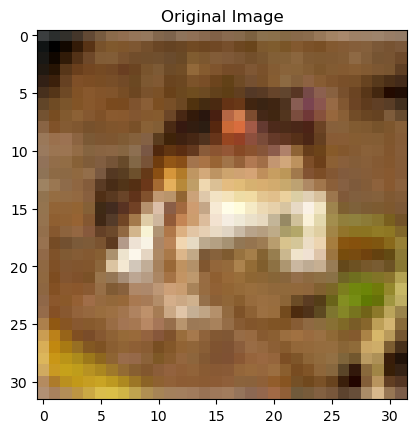

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert to float and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Select an image for demonstration
image = x_train[0]
plt.imshow(image)
plt.title('Original Image')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


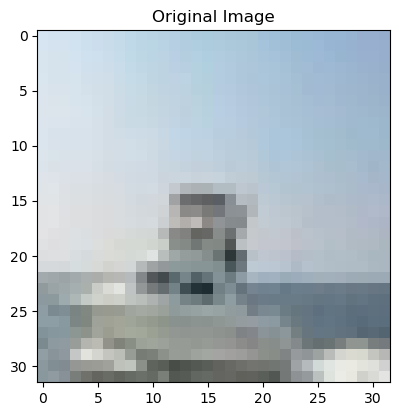

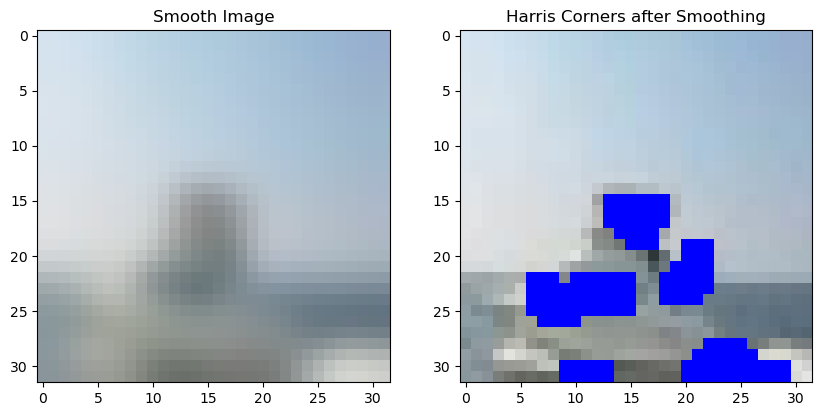

In [ ]:
# Function to apply Harris Corner Detection with Gaussian Smoothing
def apply_harris_corners(image, block_size=2, ksize=3, k=0.04, sigma=1.5):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to smooth the image
    gray = cv2.GaussianBlur(gray, (0, 0), sigma)
    # Apply Harris Corner Detector
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    # Result is dilated for marking the corners
    dst = cv2.dilate(dst, None)
    # Threshold for an optimal value, it may vary depending on the image.
    image[dst > 0.03 * dst.max()] = [0, 0, 255]
    return image

# Choose an image to display
index = 100  # Change index to see different images
image = x_train[index]
blurr= cv2.GaussianBlur(image, (0, 0), 1.5)
harris_image = apply_harris_corners(image.copy())

# Display the original and the Harris Corners
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurr)
plt.title('Smooth Image')

plt.subplot(1, 2, 2)
plt.imshow(harris_image)
plt.title('Harris Corners after Smoothing')
plt.show()